<a href="https://colab.research.google.com/github/khushalrs/ML_Repo/blob/main/Canny_Edge_Detector_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MINI PROJECT

#CANNY EDGE DETECTION ALGORITHM

Name: Soham Singhal, Shraddha Sawant, Dharmik Shetty, Khushal Sharma

Roll Nos.: I059, I067, I073, I083

Program: B.Tech

Stream: Artificial Intelligence 

Subject: Signal and Image Processing

Canny Edge Detector:

The Canny edge detector is an edge detection operator that uses a multi-stage algorithm to detect a wide range of edges in images. It was developed by John F. Canny in 1986. Canny also produced a computational theory of edge detection explaining why the technique works.

In [ ]:
#IMPORTS
import numpy as np #mathematical calculations
import matplotlib.pyplot as plt  #plotting
import cv2  #read image

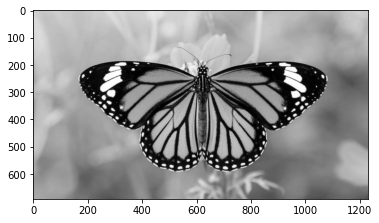

In [ ]:
 #reading the image
img = cv2.imread('test5.jpg',0)
plt.imshow(img, cmap='gray')

Step 1 - Noise reduction

Step 2 - Gradient calculation

Step 3 - Non-maximum suppression

Step 4 - Double threshold

Step 5 - Edge Tracking by Hysteresis.

#1)Noise Reduciton<br>
We use gaussian filtering to get rid of noise in our image.<br>
The kernel for gaussian blur of size (2k+1) X (2k+1) is given by the equation:
$$G(x,y) = \frac{e^{-\frac{x^2+y^2}{2σ^2}}}{2*π*\sigma^2};1≤x,y≤2k+1$$


In [ ]:
#Function used to do convolution of 2 Dimentional matrices 
def convolution2d(image, kernel):
  m, n = kernel.shape
  if (m == n):
    y, x = image.shape
    y = y - m + 1 #Setting up constants
    x = x - m + 1
    new_image = np.zeros((y,x))
    for i in range(y):
      for j in range(x):
        new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel) #Using a subset of the image and applying element multiplication
  return new_image

In [ ]:
#Function to generate and apply gaussian filter to an given image
def gaussian_blur(img, size=5, sigma=1, flag=False):
  k=(size-1)//2 #Constant to get the number of rows behind and after the origin
  x = np.array([np.arange(-k, k+1) for i in range(size)])
  y = np.transpose(x)
  normal = 1 / (2.0 * np.pi * sigma**2) 
  g_filter =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal #We get the gaussian filter of the required size
  blur_img = convolution2d(img, g_filter) # Convolve the image with the gaussian filter
  if flag:
    plt.figure(figsize=(15,20))
    plt.subplot(1,2,1)
    plt.imshow(img, cmap='gray')
    plt.title("Original Image")
    plt.subplot(1,2,2)
    plt.imshow(blur_img, cmap='gray')
    plt.title("Blurred Image")
  return blur_img

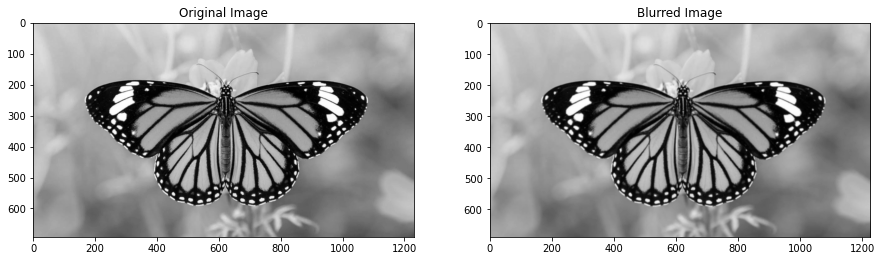

In [ ]:
#Driver code for test image
gaussian_img = gaussian_blur(img, 5, flag=True)

#2)Gradient Calculation<br>
Sobel filters - <br>
$kx = \begin{bmatrix}
-1 & 0 & 1\\
-2 & 0 & 2\\
-1 &0&1
\end{bmatrix}$
$ky = \begin{bmatrix}
1& 2 & 1\\
0 & 0 & 0\\
-1 &-2&-1
\end{bmatrix}$<br>
Using these two we can find the magnitude and angle $\theta$ of the gradient<br>
$|G| = \sqrt{I_{x}^2+I_{y}^2}$<br>
$θ = arctan(\frac{I_y}{I_x})$


In [ ]:
def gradient_calculate(img, flag=False):
  kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype = float) #Initializing the sobel mask for vertical edges
  ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype = float) #Initializing the sobel mask for horizontal edges

  Ix = convolution2d(img, kx) #Applying convolution to get vertical edges
  Iy = convolution2d(img, ky) #Applying convolution to get horizontal edges

  G = np.sqrt(Ix**2+Iy**2) #Calculating gradient
  G = G/G.max()
  G = G*255

  theta = np.arctan(Ix/Iy) #Calculating angle of the edges
  if flag:
    plt.figure(figsize=(15, 20))
    plt.subplot(1,2,1)
    plt.imshow(img, cmap='gray')
    plt.title("Blurred Image")
    plt.subplot(1,2,2)
    plt.imshow(G, cmap='gray')
    plt.title("Gradient Image")

  return (G,theta)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


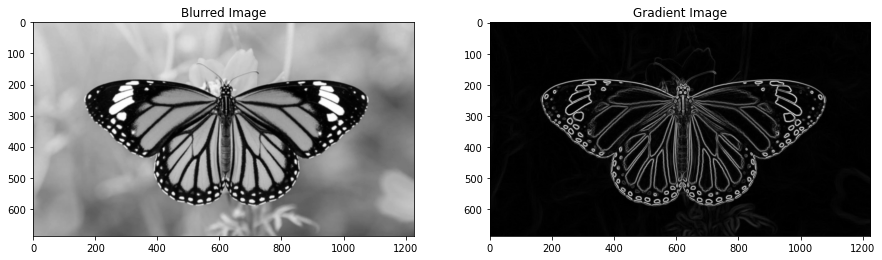

In [ ]:
#Driver code for test image
gradient_img, theta = gradient_calculate(gaussian_img, flag=True)

#3)Non Maximum Suppression<br>
We need to make the edges thinner.
The algorithm goes through all the points on the gradient intensity matrix and finds the pixels with the maximum value in the edge directions.

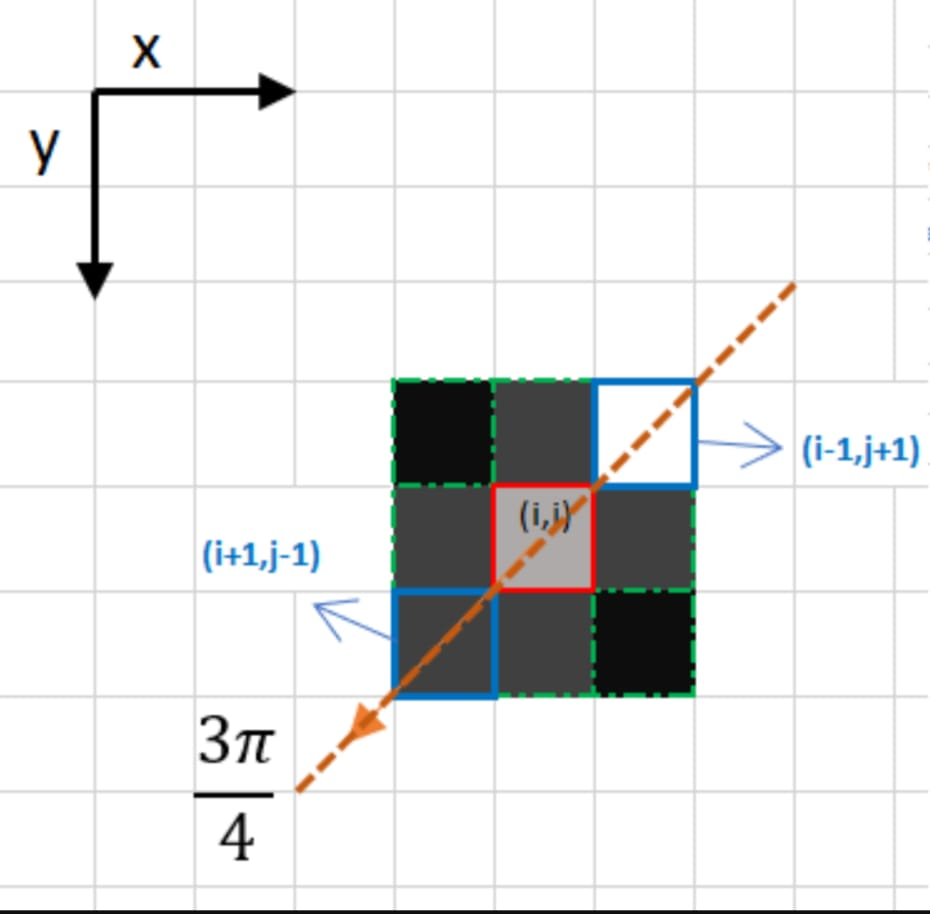

In [ ]:
def non_max_suppression(img, theta, flag=False):
  M, N = img.shape
  Z = np.zeros((M,N), dtype=np.int32)
  angle = theta * 180. / np.pi #Converting angle to degrees
  angle[angle < 0] += 180    
  for i in range(1,M-1):
    for j in range(1,N-1):
      q = 255 #Initializing value
      r = 255
      if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180): #If the edge is horizontal
        q = img[i, j+1]
        r = img[i, j-1]
      elif (22.5 <= angle[i,j] < 67.5): #If the edge is diagonal
        q = img[i+1, j-1]
        r = img[i-1, j+1]
      elif (67.5 <= angle[i,j] < 112.5): #If the edge is vertical
        q = img[i+1, j]
        r = img[i-1, j]
      elif (112.5 <= angle[i,j] < 157.5): #If the edge is diagonal
        q = img[i-1, j-1]
        r = img[i+1, j+1]
      if (img[i,j] >= q) and (img[i,j] >= r): #Edge is considered only if the intensity of the current pixel is greater than equal to its predecessor and successor
        Z[i,j] = img[i,j]
      else:
        Z[i,j] = 0 #Else it is zero
  if flag:
    plt.figure(figsize=(15,20))
    plt.subplot(1,2,1)
    plt.imshow(img, cmap='gray')
    plt.title("Gradient Image")
    plt.subplot(1,2,2)
    plt.imshow(Z, cmap='gray')
    plt.title("Suppressed Image")
  return Z

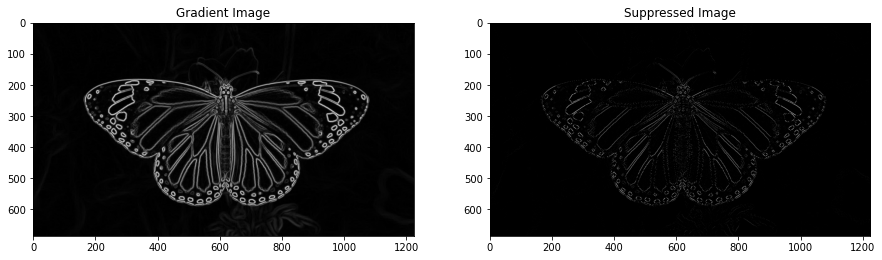

In [ ]:
#Driver code
suppressed_img = non_max_suppression(gradient_img, theta, flag=True)

#4)Double Threshold<br>
Identifying 3 types of pixels
1. Strong
2. Weak
3. Irrelevent

Depending on the intensity value of each pixel.

In [ ]:
def double_thresholding(img, flag=False):
  high_thresh_val = img.max()*0.15 #Initializing the higher threshold value
  low_thresh_val = img.max()*0.05 #Initialiing the lower threshold value
  m,n = img.shape
  weak = 75 #Initializing the resulting thresholded value of weaker pixel
  strong = 255 #Initializing the resulting thresholded value of stronger pixel
  strong_x,strong_y = np.where(img>=high_thresh_val) #Getting all the strong pixels
  weak_x,weak_y = np.where((img>=low_thresh_val) & (img<=high_thresh_val)) #Getting all the weaker pixels
  zero_x,zero_y = np.where(img<low_thresh_val) #Getting the pixels which have value less the lower threshold value
  #Creating the resulting matrix of all the pixels with their respective values
  result = np.zeros((m,n))
  result[strong_x, strong_y] = strong
  result[weak_x, weak_y] = weak
  if flag:
    plt.figure(figsize=(15,20))
    plt.subplot(1,2,1)
    plt.imshow(img, cmap='gray')
    plt.title("Suppressed Image")
    plt.subplot(1,2,2)
    plt.imshow(result, cmap='gray')
    plt.title("Thresholded Image")
  return result

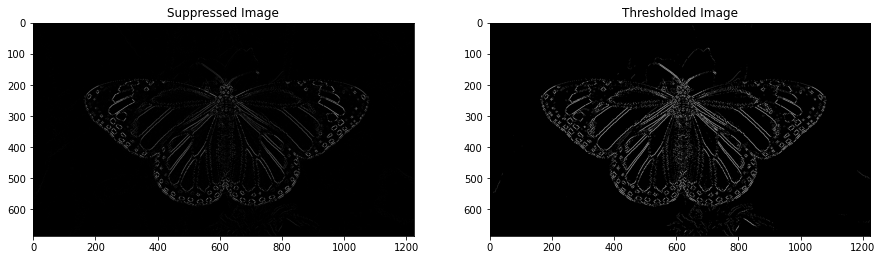

In [ ]:
#Driver code
threshold_img = double_thresholding(suppressed_img, flag=True)

#5)Hysteresis<br>
Tracking of edge by seeing if there are any strong pixels surrounding the chosen one.

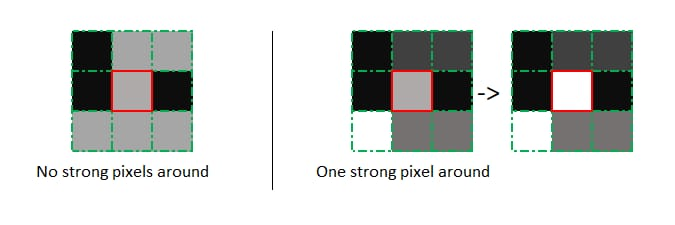

In [ ]:
def hysteresis(img, weak=75, strong=255, flag=False):
  M, N = img.shape 
  new_img = np.copy(img) 
  for i in range(1, M-1):
    for j in range(1, N-1):
      if (img[i,j] == weak):
        try:
          #If any of the neighbouring pixel have stronger intensity then the current pixel is also given the stronger intensity
          if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
          or (img[i, j-1] == strong) or (img[i, j+1] == strong)
          or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
            new_img[i, j] = strong
          else:
            new_img[i, j] = 0
        except IndexError as e:
            pass
  if flag:
    plt.figure(figsize=(15,20))
    plt.subplot(1,2,1)
    plt.imshow(img, cmap='gray')
    plt.title("Thresholded Image")
    plt.subplot(1,2,2)
    plt.imshow(new_img, cmap='gray')
    plt.title("Final Image")
  return new_img

True

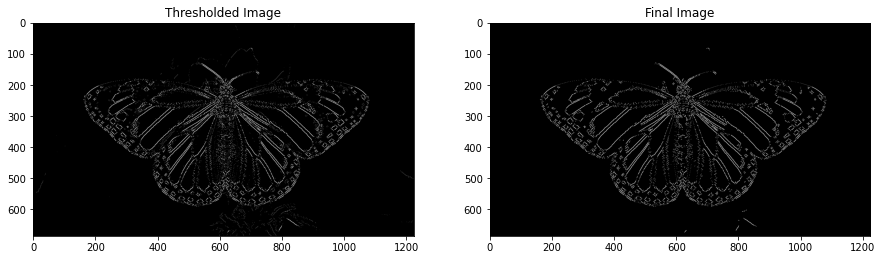

In [ ]:
#Driver code
final_img = hysteresis(threshold_img, flag=True)
cv2.imwrite("final_img.jpg", final_img)

In [ ]:
def edge_detection(test_img, i, size=5): #Function to directly apply canny edge detection
  gaussian_img = gaussian_blur(test_img, 5)
  gradient_img, theta = gradient_calculate(gaussian_img)
  suppressed_img = non_max_suppression(gradient_img, theta)
  threshold_img = double_thresholding(suppressed_img)
  final_img = hysteresis(threshold_img)
  path = "edge"+str(i)+".jpg"
  cv2.imwrite(path, final_img)

In [ ]:
#Code for test images
for i in range(1, 12):
  path = "test"+str(i)+".jpg"
  test = cv2.imread(path,0)
  edge_detection(test, i)  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


#Conclusion:

Canny edge detection technique detects all the edges in a image which is not useful to identify individual object and hence removes them.

There a scope for improvement though that when the gaussian filter blurs out the entire image which inturn also blurs out the edges which might be crucial so instead we can use adaptive gaussian filter to change the value of variance to not blur out the edges.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
! jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/I059, I067, I073, I083 SIP.ipynb'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/I059, I067, I073, I083 SIP.ipynb to html
[NbConvertApp] Writing 1367619 bytes to /content/drive/MyDrive/Colab Notebooks/I059, I067, I073, I083 SIP.html
